In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import statsmodels.api as sm
%matplotlib inline

/home/vivek/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Tried using Facebook profhet which did not work.

In [2]:
fb = pdr.get_data_yahoo('GOOG', start='3/14/2007', end='1/17/2018')
fb.rename(columns={'Adj Close': 'Facebook'}, inplace=True)
fb.rename(columns={'Volume': 'Vol-Facebook'}, inplace=True)
fb.rename(columns={'Open': 'y'}, inplace=True)
len(fb)

2733

In [3]:
from fbprophet import Prophet
fb.drop(['High', 'Low', 'Close', 'Facebook','Vol-Facebook'], axis = 1, inplace = True)


In [4]:
fb4=fb.tail(400)

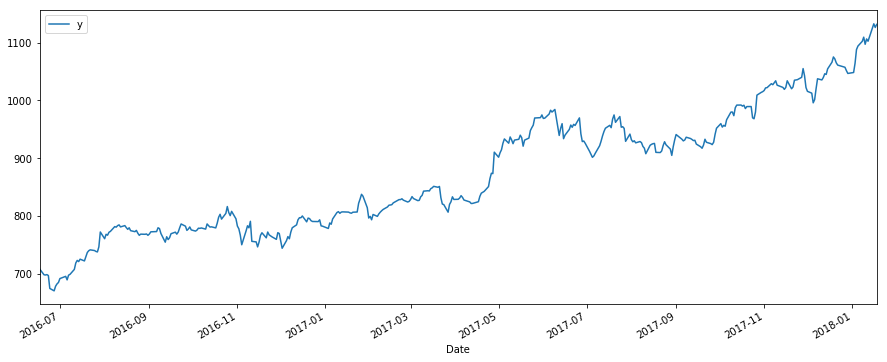

In [5]:
fb4.plot(figsize=(15, 6))
plt.show()

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
#fb['Date'] = pd.to_datetime(fb['Date'])

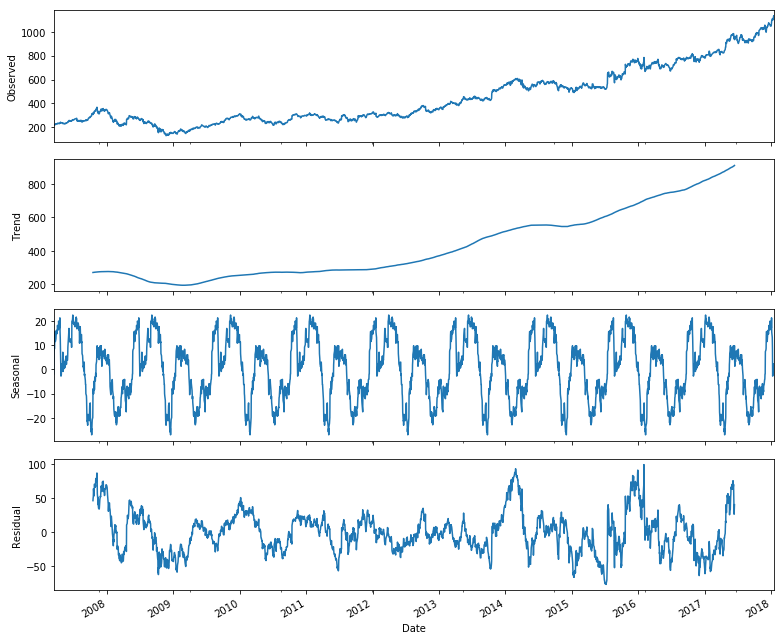

In [7]:
s=sm.tsa.seasonal_decompose(fb, model='additive', freq=300)
fig = s.plot()
plt.show()

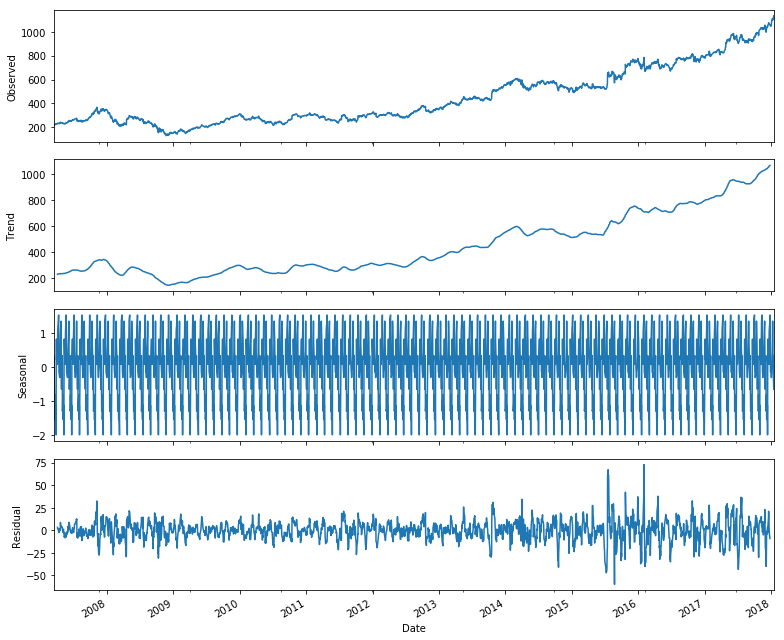

In [8]:
s=sm.tsa.seasonal_decompose(fb, model='additive', freq=30)
fig = s.plot()
plt.show()

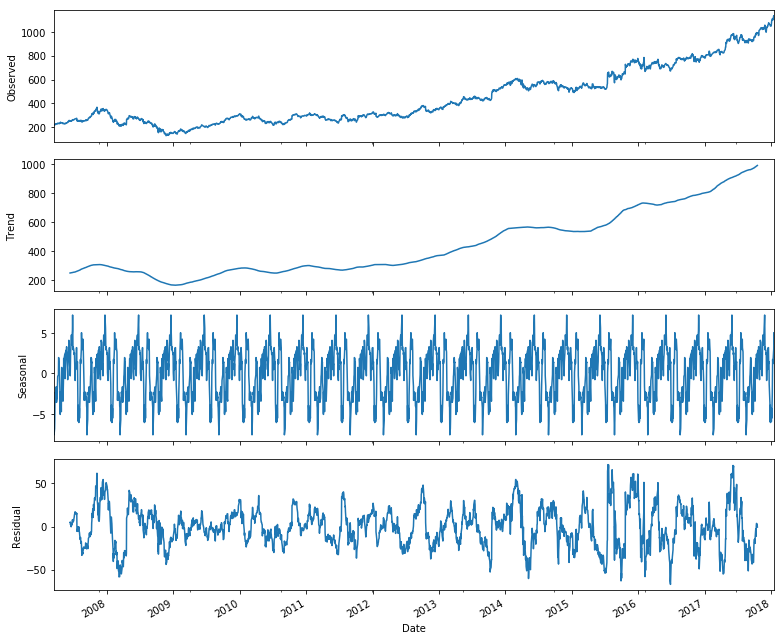

In [9]:
s=sm.tsa.seasonal_decompose(fb, model='additive', freq=125)
fig = s.plot()
plt.show()

In [10]:
fb = fb.reset_index()
#m = Prophet()
#m.fit(fb)
fb1=fb.head(len(fb)-100)
fb2=fb.tail(100)

In [11]:
fb1.rename(columns={'Date': 'ds'}, inplace=True)

/home/vivek/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [12]:
m = Prophet()
m.fit(fb1);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future_dates = m.make_future_dataframe(periods=100)

In [14]:
future_dates.tail()

,ds
2728,2017-11-28
2729,2017-11-29
2730,2017-11-30
2731,2017-12-01
2732,2017-12-02


In [15]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)

,ds,yhat,yhat_lower,yhat_upper
2732,2017-12-02,973.536587,935.741986,1007.926532


In [16]:
q1=forecast['yhat'].tail(100)

In [17]:
q2=fb2['y']


In [18]:
from sklearn.metrics import r2_score
r2_score(q1, q2)

-10.631165249002139

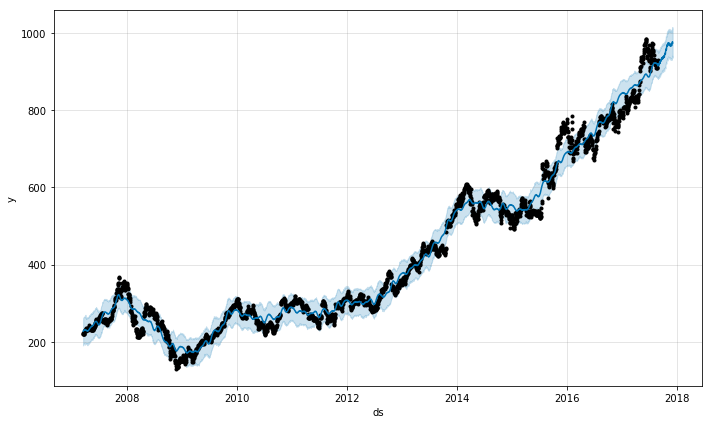

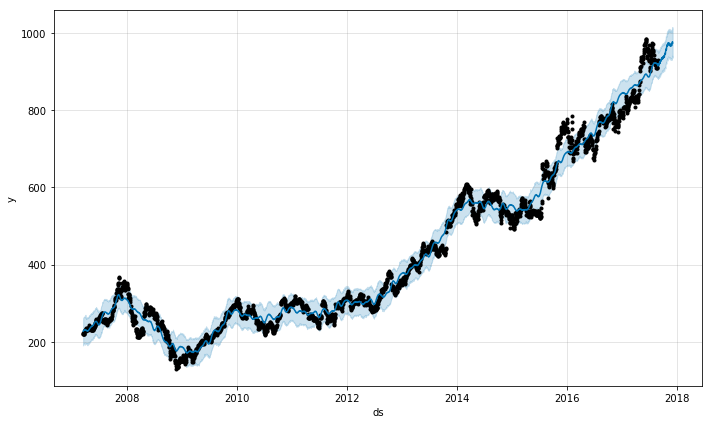

In [19]:
m.plot(forecast, uncertainty=True)


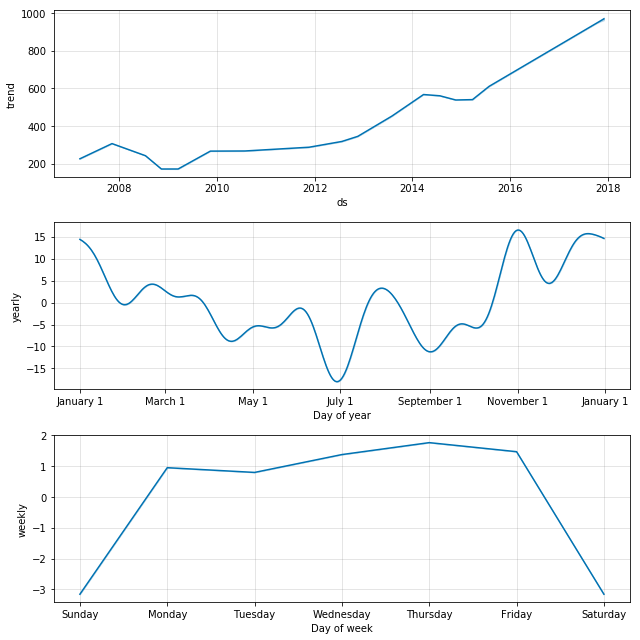

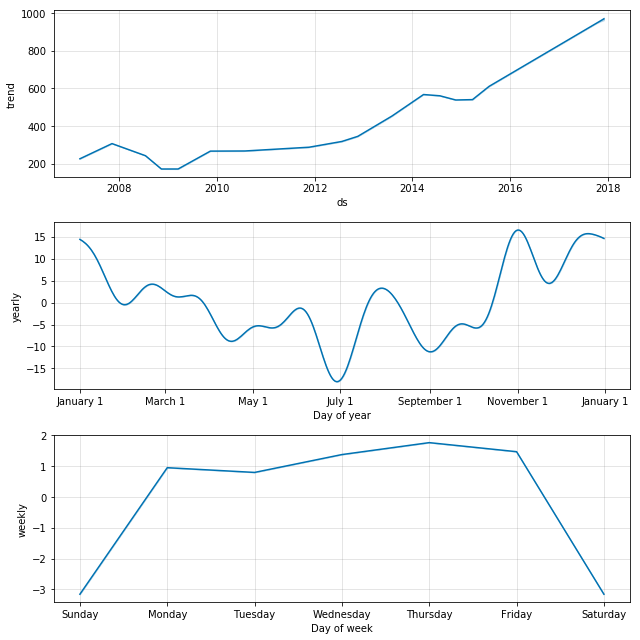

In [20]:
m.plot_components(forecast)